# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [3]:
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [7]:
df.set_index('Date', inplace=True)

In [8]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [9]:
df.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [10]:
df.sort_index(inplace=True)
df.head(40)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


### Step 9. Get the last business day of each month

In [11]:
# This is the provided solution, but not correct.
df_end_of_month = df.resample('BM').mean()
df_end_of_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


In [12]:
# The above is incorrect. It shows an aggregated value for the last date of the month. I will find how to get the 
# individual values for the last date of every month.
from pandas.tseries.offsets import MonthEnd

In [13]:
# Can do it as a mask directly
df[df.index == (df.index + MonthEnd(0))]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
1981-06-30,26.13,26.13,26.00,26.00,8976800,0.41
1981-07-31,25.00,25.12,25.00,25.00,2738400,0.39
...,...,...,...,...,...,...
2014-01-31,495.18,501.53,493.55,500.60,116199300,70.69
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25


In [14]:
# Or can create a new column on the end and then create a mask out of that.
df['month_end'] = df.index + MonthEnd(0)
df[df.index == df.month_end]

,Open,High,Low,Close,Volume,Adj Close,month_end
Date,,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53,1980-12-31
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38,1981-03-31
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44,1981-04-30
1981-06-30,26.13,26.13,26.00,26.00,8976800,0.41,1981-06-30
1981-07-31,25.00,25.12,25.00,25.00,2738400,0.39,1981-07-31
...,...,...,...,...,...,...,...
2014-01-31,495.18,501.53,493.55,500.60,116199300,70.69,2014-01-31
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76,2014-02-28
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25,2014-03-31


### Step 10.  What is the difference in days between the first day and the oldest

In [18]:
(df.index.max() - df.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [25]:
df.index.to_period('M').nunique()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

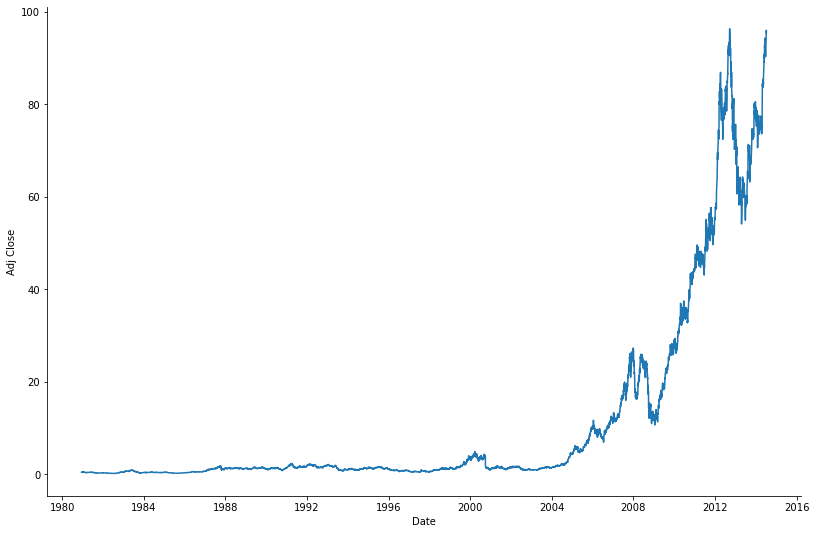

In [37]:
plt.figure(figsize=(13.5,9))
sns.lineplot(data= df['Adj Close'])
sns.despine()

### BONUS: Create your own question and answer it.